<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/9.%20Data%20Cleaning%20and%20Preprocessing/Data_Cleaning_and_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
# Machine Learning
# Portfolio Project
# #9
# Data Cleaning
# Goal = Conduct market basket analysis to identify product associations and customer buying patterns.

# unsupervised learning

# find what item a customer is most likely to buy based on information about customer purchase history data

# Apriori algorithm
## a machine learning algorithm used to find frequent itemsets and association rules in data

# Identify frequent items
## identifying the most frequent individual items in the data

# Association rules
## a rule might say that if items A and B are in a transaction, then item C is likely to be included as well

## The Apriori algorithm uses the insight that adding items to a frequently purchased group can only make it less frequent.

## The algorithm requires two important parameters: minimum support and minimum confidence

# support
## Support basically refers to the number of times the chosen item/s appears in the database

# Confidence
## Confidence refers to the frequency of A and B being together, given the number of times A has occurred.

# Lift
## the likelihood of the itemset B being purchased when item A is purchased while taking into account the support of B

# Market Basket Analysis
## customers who buy a certain item (or group of items) are more likely to buy another specific item (or group of items)

## The relations hence can be used to increase profitability through cross-selling, recommendations, promotions, or even the placement of items on a menu or in a store.


# https://en.wikipedia.org/wiki/Apriori_algorithm

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


# Branding statement

In [ ]:
# https://i.ibb.co/zZswY34/Pink-hands-network-2.png

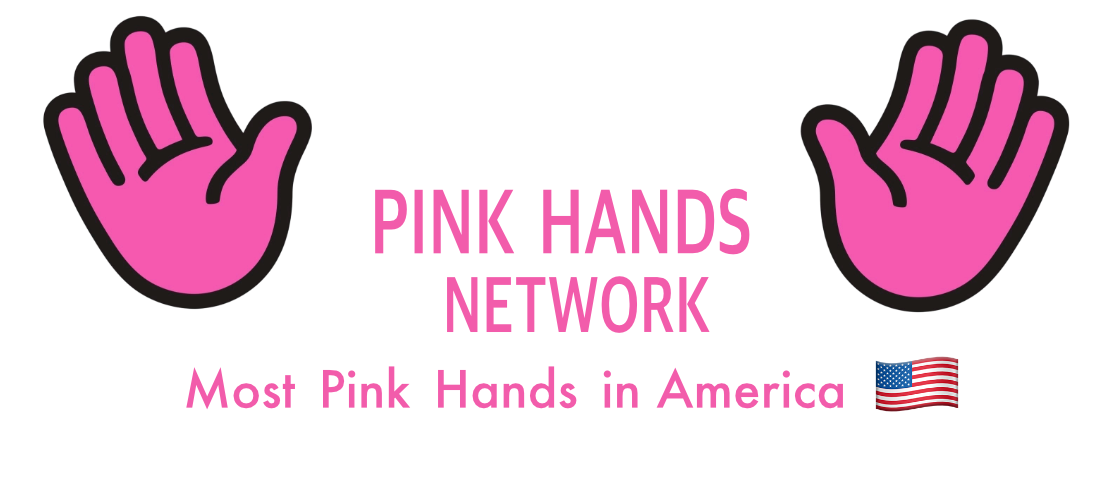

In [ ]:
from IPython.display import Image
Image('https://i.ibb.co/zZswY34/Pink-hands-network-2.png')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# EDA, Exploratory Data Analysis

## import libraries

In [ ]:
print('Hello, Market Basket Analysis')

Hello, Market Basket Analysis


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Input data

In [ ]:
! wget https://github.com/anumit-web/ML-Analytics-Portfolio-2024/blob/main/8.%20Market%20Basket%20Analysis/dataset/Assignment-1_Data.csv.zip?raw=true

--2024-10-07 12:40:58--  https://github.com/anumit-web/ML-Analytics-Portfolio-2024/blob/main/8.%20Market%20Basket%20Analysis/dataset/Assignment-1_Data.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/anumit-web/ML-Analytics-Portfolio-2024/raw/refs/heads/main/8.%20Market%20Basket%20Analysis/dataset/Assignment-1_Data.csv.zip [following]
--2024-10-07 12:40:58--  https://github.com/anumit-web/ML-Analytics-Portfolio-2024/raw/refs/heads/main/8.%20Market%20Basket%20Analysis/dataset/Assignment-1_Data.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anumit-web/ML-Analytics-Portfolio-2024/refs/heads/main/8.%20Market%20Basket%20Analysis/dataset/Assignment-1_Data.csv.zip [following]
--2024-10-07 12:40:59--  https://raw.githubuserconten

In [ ]:
# import os

# old_file = 'Assignment-1_Data.csv.zip?raw=true'
# new_file = 'Assignment-1_Data.csv.zip'
# os.rename(old_file, new_file)

In [ ]:
# ! unzip Assignment-1_Data.csv.zip

In [ ]:
# wget https://github.com/anumit-web/ML-Analytics-Portfolio-2024/blob/main/8.%20Market%20Basket%20Analysis/dataset/Assignment-1_Data.csv.zip

In [ ]:
# raise SystemExit("Stop right there!")

In [ ]:
# input_data_df = pd.read_csv("https://raw.githubusercontent.com/anumit-web/ML-Analytics-Portfolio-2024/refs/heads/main/7.%20Financial%20Analysis%20and%20Modeling/datasets/NFLX.csv")

In [ ]:
# input_data_df = pd.read_csv("Assignment-1_Data.csv")

In [ ]:
# https://zenodo.org/records/13894281/files/Assignment-1_Data.csv

input_data_df = pd.read_csv("https://zenodo.org/records/13894281/files/Assignment-1_Data.csv",
                            sep = ';')

<ipython-input-12-9880c47b6074>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  input_data_df = pd.read_csv("https://zenodo.org/records/13894281/files/Assignment-1_Data.csv",


In [ ]:
number_of_rows = input_data_df.shape[0]
number_of_columns = input_data_df.shape[1]
print("Numner of rows = ", number_of_rows)
print("Number of columns = ", number_of_columns)

Numner of rows =  522064
Number of columns =  7


In [ ]:

input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
input_data_df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,09.12.2011 12:50,"4,95",12680.0,France


In [ ]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
input_data_df.describe()


,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


print column names

In [ ]:
print(input_data_df.columns)

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')


In [ ]:
# Get all Column Header Labels as List
for column_headers in  input_data_df.columns:
    print(column_headers)

BillNo
Itemname
Quantity
Date
Price
CustomerID
Country


## find list of all columns which have null values
using SKIMPY

In [ ]:
# Get the count of null values in each column
null_counts = input_data_df.isnull().sum()
print('Priniting count of null values = ')
print(null_counts)

Priniting count of null values = 
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
try:
  import skimpy
except:
  !pip install skimpy
  import skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 20.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.7.1
    Uninstalling polars-1.7.1:
      Successfully uninstalled polars-1.7.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykern

In [ ]:
# ! pip install skimpy

In [ ]:
from skimpy import skim

In [ ]:
skim(input_data_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 522064 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name   ┃ NA       ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Quantity      │        0 │      0 │  10.09 │  161.1 │  -9600 │      1 │      3 │     10 │  81000 │    ▇    │  │
│ │ CustomerID    │   134041 │  25.68 │  15320 │   1722 │  12350 │  13950 │  15260 │  16840 │  18290 │ ▇▇▇▇▇▇  │  │
│ └───────────────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Itemname                 │       1455 │       0.28 │                         4.4 │                 2304413 │  │
│ │ Date                     │          0 │          0 │                           2 │                 1044128 │  │
│ │ Price                    │          0 │          0 │                           1 │                  522064 │  │
│ │ Country                  │          0 │          0 │                         1.9 │                 1010115 │  │
│ └──────────────────────────┴────────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## find unique values by column names

In [ ]:
# Find the number of unique values in both 'Name' and 'Age' columns
unique_values = input_data_df.nunique()
print(unique_values)

BillNo        21665
Itemname       4185
Quantity        690
Date          19641
Price          1285
CustomerID     4297
Country          30
dtype: int64


In [ ]:
try:
  import summarytools
except:
  !pip install summarytools
  import summarytools

In [ ]:
# ! pip install summarytools

In [ ]:
from summarytools import dfSummary

In [ ]:
dfSummary(input_data_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,BillNo[object],1. 5735852. 5812193. 5814924. 5807295. 5584756. 5797777. 5812178. 5374349. 58073010. 53807111. other,"1,114 (0.2%)749 (0.1%)731 (0.1%)721 (0.1%)705 (0.1%)687 (0.1%)676 (0.1%)675 (0.1%)662 (0.1%)652 (0.1%)514,692 (98.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8zcz8zt3g/hqn1s2/Z2eHh4+Ho8Hs97v4brta7ry7Is3w7H4/H89PT0djqd3vd+FNfn9fX17nK5nJ+fn28PMzOn0+n98fHxx94P42rdz/iBQEhsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuYw8/szkL0fwnX6u63Duq4vl8vlPH8+A4F/bV3Xl5n58Fk4hY9t296sq8j4gUBGbGTERkZsZMRGRmxkxEZGbGTERuYXwgdpOf758ysAAAAASUVORK5CYII="">",0(0.0%)
2,Itemname[object],1. WHITE HANGING HEART T-LIGHT HO2. JUMBO BAG RED RETROSPOT3. REGENCY CAKESTAND 3 TIER4. PARTY BUNTING5. LUNCH BAG RED RETROSPOT6. ASSORTED COLOUR BIRD ORNAMENT7. nan8. SET OF 3 CAKE TINS PANTRY DESI9. PACK OF 72 RETROSPOT CAKE CASE10. LUNCH BAG BLACK SKULL.11. other,"2,269 (0.4%)2,087 (0.4%)1,930 (0.4%)1,677 (0.3%)1,570 (0.3%)1,465 (0.3%)1,455 (0.3%)1,360 (0.3%)1,328 (0.3%)1,315 (0.3%)505,608 (96.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADoElEQVR4nO3cQWojVxhG0b+McNqTEkLgJSR78CJ6sb0ILSJ7MMY1iDueKIMEYtKdSaBvgXLOyGj0Bhc9SdTn5Xq9DhTu9j4A/x9iIyM2MmIjIzYyYiMjNjJiIyM2MsvMPMzMXK/Xt53Pwo07nM/nzzMzy7J8ERw/0t26rqd1XU8zc7/3YbhtPrORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nDtm0vf/39vutJuHk2CGQW/zKLinc2MtZVZKyryPjpg4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGY+FkzF4IeOdjYzBCxmDFzJ++iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsZj4WQMXsj4zEZGbGTulmX5ZVmWT3sfhNt3NzM/z8xPex+E2+caJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjczczv87M73sfhNtn8ELGNUpGbGQMXsgYvJBxjZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsY1SkZsZAxeyBi8kHGNkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkXKNkxEbGuoqMdRUZ1ygZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2Rco2TERsbghYzBCxnXKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFyjZMRGRmxkrKvIWFeRcY2SERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGNUpGbGQMXsgYvJBxjZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsY1SmaZmYeZud/7INyc9+v1+vbxhcP5fP68rutprxNxm7Zte1mW5cvH4A7rup6enp7ejsfj1z0Px+14fX39dLlcTs/Pz/cz83dsMzPH4/Hr4+Pjb7udjlv08M8XfEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5j585GQvQ/C7fi3ng7btr1cLpfTfOeREPivtm17mZn3j695LJwf5ZvHwq2ryPiCQEZsZMRGRmxkxEZGbGTERkZsZMRG5g//Y5666t8WrwAAAABJRU5ErkJggg=="">","1,455(0.3%)"
3,Quantity[int64],Mean (sd) : 10.1 (161.1)min < med < max:-9600.0 < 3.0 < 80995.0IQR (CV) : 9.0 (0.1),690 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABdklEQVR4nO3XQWobQRCG0eogFGkzgxDoMDpEDutD6DbCtBa2HJA6Jwh2JhbOT9

# Data Processing

convert date column to date data tupe

In [ ]:
# print
input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
# input_data_df["Date"]=pd.to_datetime(input_data_df["Date"])

input_data_df["Date"] = pd.to_datetime(input_data_df["Date"], format='%d.%m.%Y %H:%M')

In [ ]:
input_data_df['Price'] = input_data_df['Price'].str.replace(',','.')

In [ ]:
input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
input_data_df.dtypes

,0
BillNo,object
Itemname,object
Quantity,int64
Date,datetime64[ns]
Price,object
CustomerID,float64
Country,object


In [ ]:

# Change the 'Age' column type to float
input_data_df['Price'] = pd.to_numeric(input_data_df['Price'], downcast='float')

In [ ]:
# Change the 'Age' column type to int
# input_data_df['BillNo'] = pd.to_numeric(input_data_df['BillNo'], downcast='integer')

# Change the 'Age' column type to int
# input_data_df['Quantity'] = pd.to_numeric(input_data_df['Quantity'], downcast='integer')

In [ ]:

# Convert the 'Age' colum n to string
input_data_df['BillNo'] = input_data_df['BillNo'].astype(str)

In [ ]:
input_data_df.dtypes

,0
BillNo,object
Itemname,object
Quantity,int64
Date,datetime64[ns]
Price,float32
CustomerID,float64
Country,object


<Axes: >

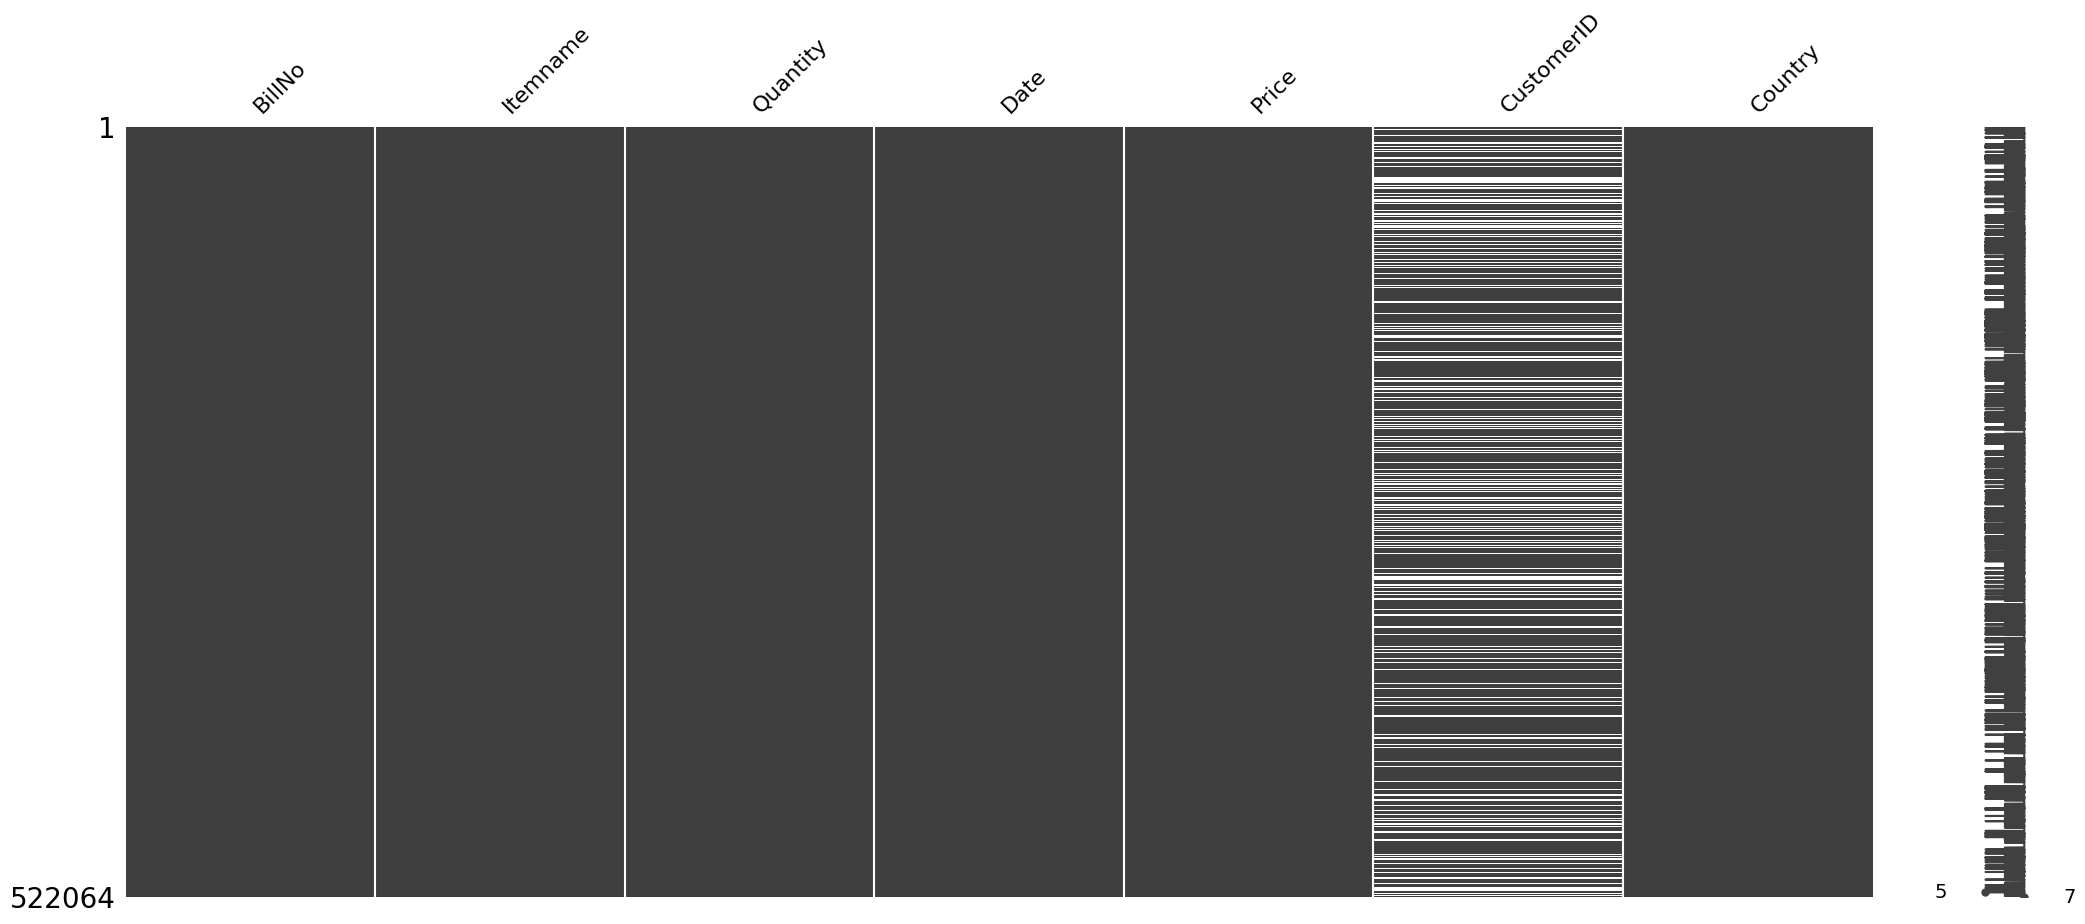

In [ ]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(input_data_df)

In [ ]:
# exit(0)

change index to date tyoe and date column

In [ ]:
# input_data_df.index = input_data_df['Date']

In [ ]:
input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


do NOT drop date column because we need it for model training for linear and random forest algorithms

In [ ]:
# input_data_df = input_data_df.drop('Date', axis=1)
# where 1 is the axis number (0 for rows and 1 for columns.)

In [ ]:
input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Visualization 📊📈📉

## Total Sales Analysis

We group the data by month and year, calculating the total sum of sales to understand the sales trend over time. The resulting visualization depicts the total sales per month

In [ ]:
input_data_df["Year_and_Month"] = input_data_df["Date"].dt.to_period("M")

In [ ]:
input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year_and_Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [ ]:
input_data_df["Item_Total_Price"] = input_data_df["Quantity"] * input_data_df["Price"]

In [ ]:
monthly_sales = input_data_df.groupby('Year_and_Month')['Item_Total_Price'].sum()

Text(0, 0.5, 'Total Sales')

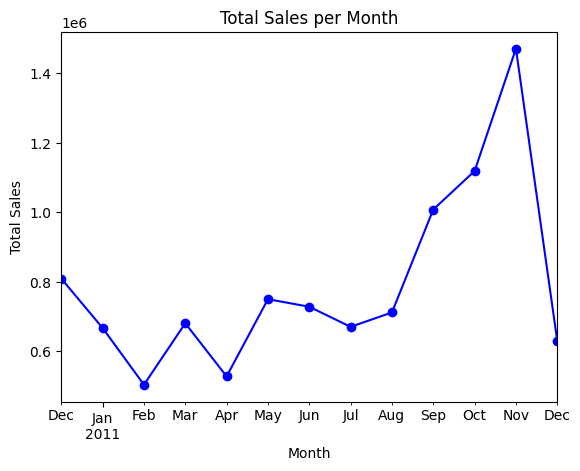

In [ ]:
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')


# Top 20 products sold



In [ ]:
product_counts = input_data_df["Itemname"].value_counts()

In [ ]:
product_counts.head(20)

,count
Itemname,
WHITE HANGING HEART T-LIGHT HOLDER,2269
JUMBO BAG RED RETROSPOT,2087
REGENCY CAKESTAND 3 TIER,1930
PARTY BUNTING,1677
LUNCH BAG RED RETROSPOT,1570
ASSORTED COLOUR BIRD ORNAMENT,1465
SET OF 3 CAKE TINS PANTRY DESIGN,1360
PACK OF 72 RETROSPOT CAKE CASES,1328
LUNCH BAG BLACK SKULL.,1315


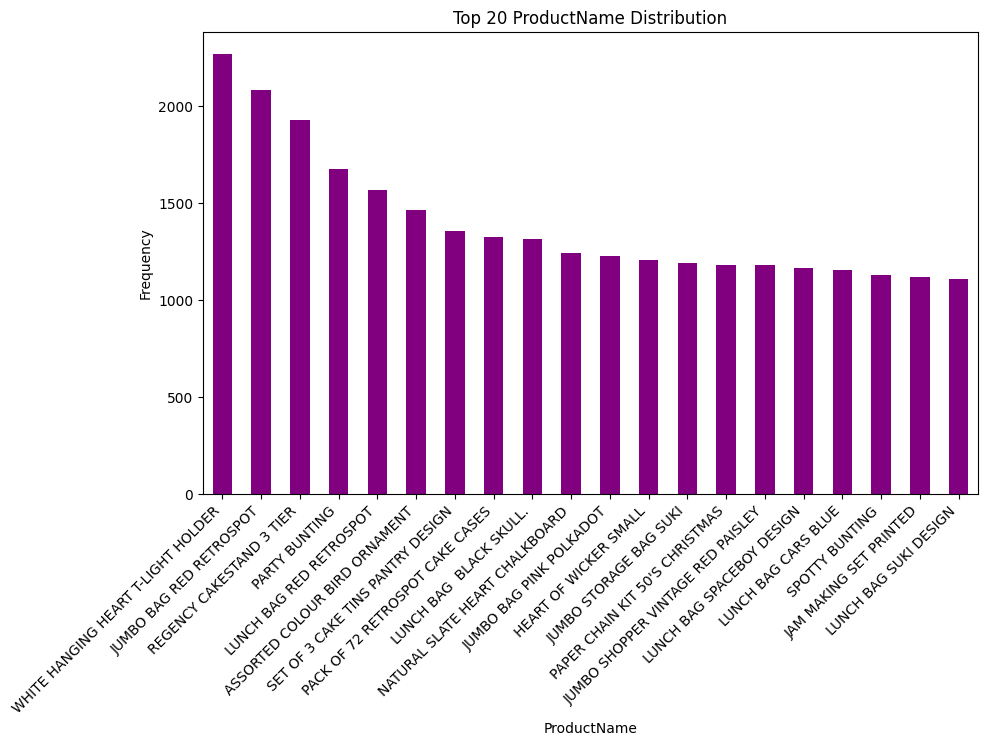

In [ ]:
product_counts.head(20).plot(kind='bar', figsize=(10, 6), color="purple")
plt.title('Top 20 ProductName Distribution')
plt.xlabel('ProductName')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
exit(0)

## create histogram

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'CustomerID'}>],
       [<Axes: title={'center': 'Item_Total_Price'}>, <Axes: >]],
      dtype=object)

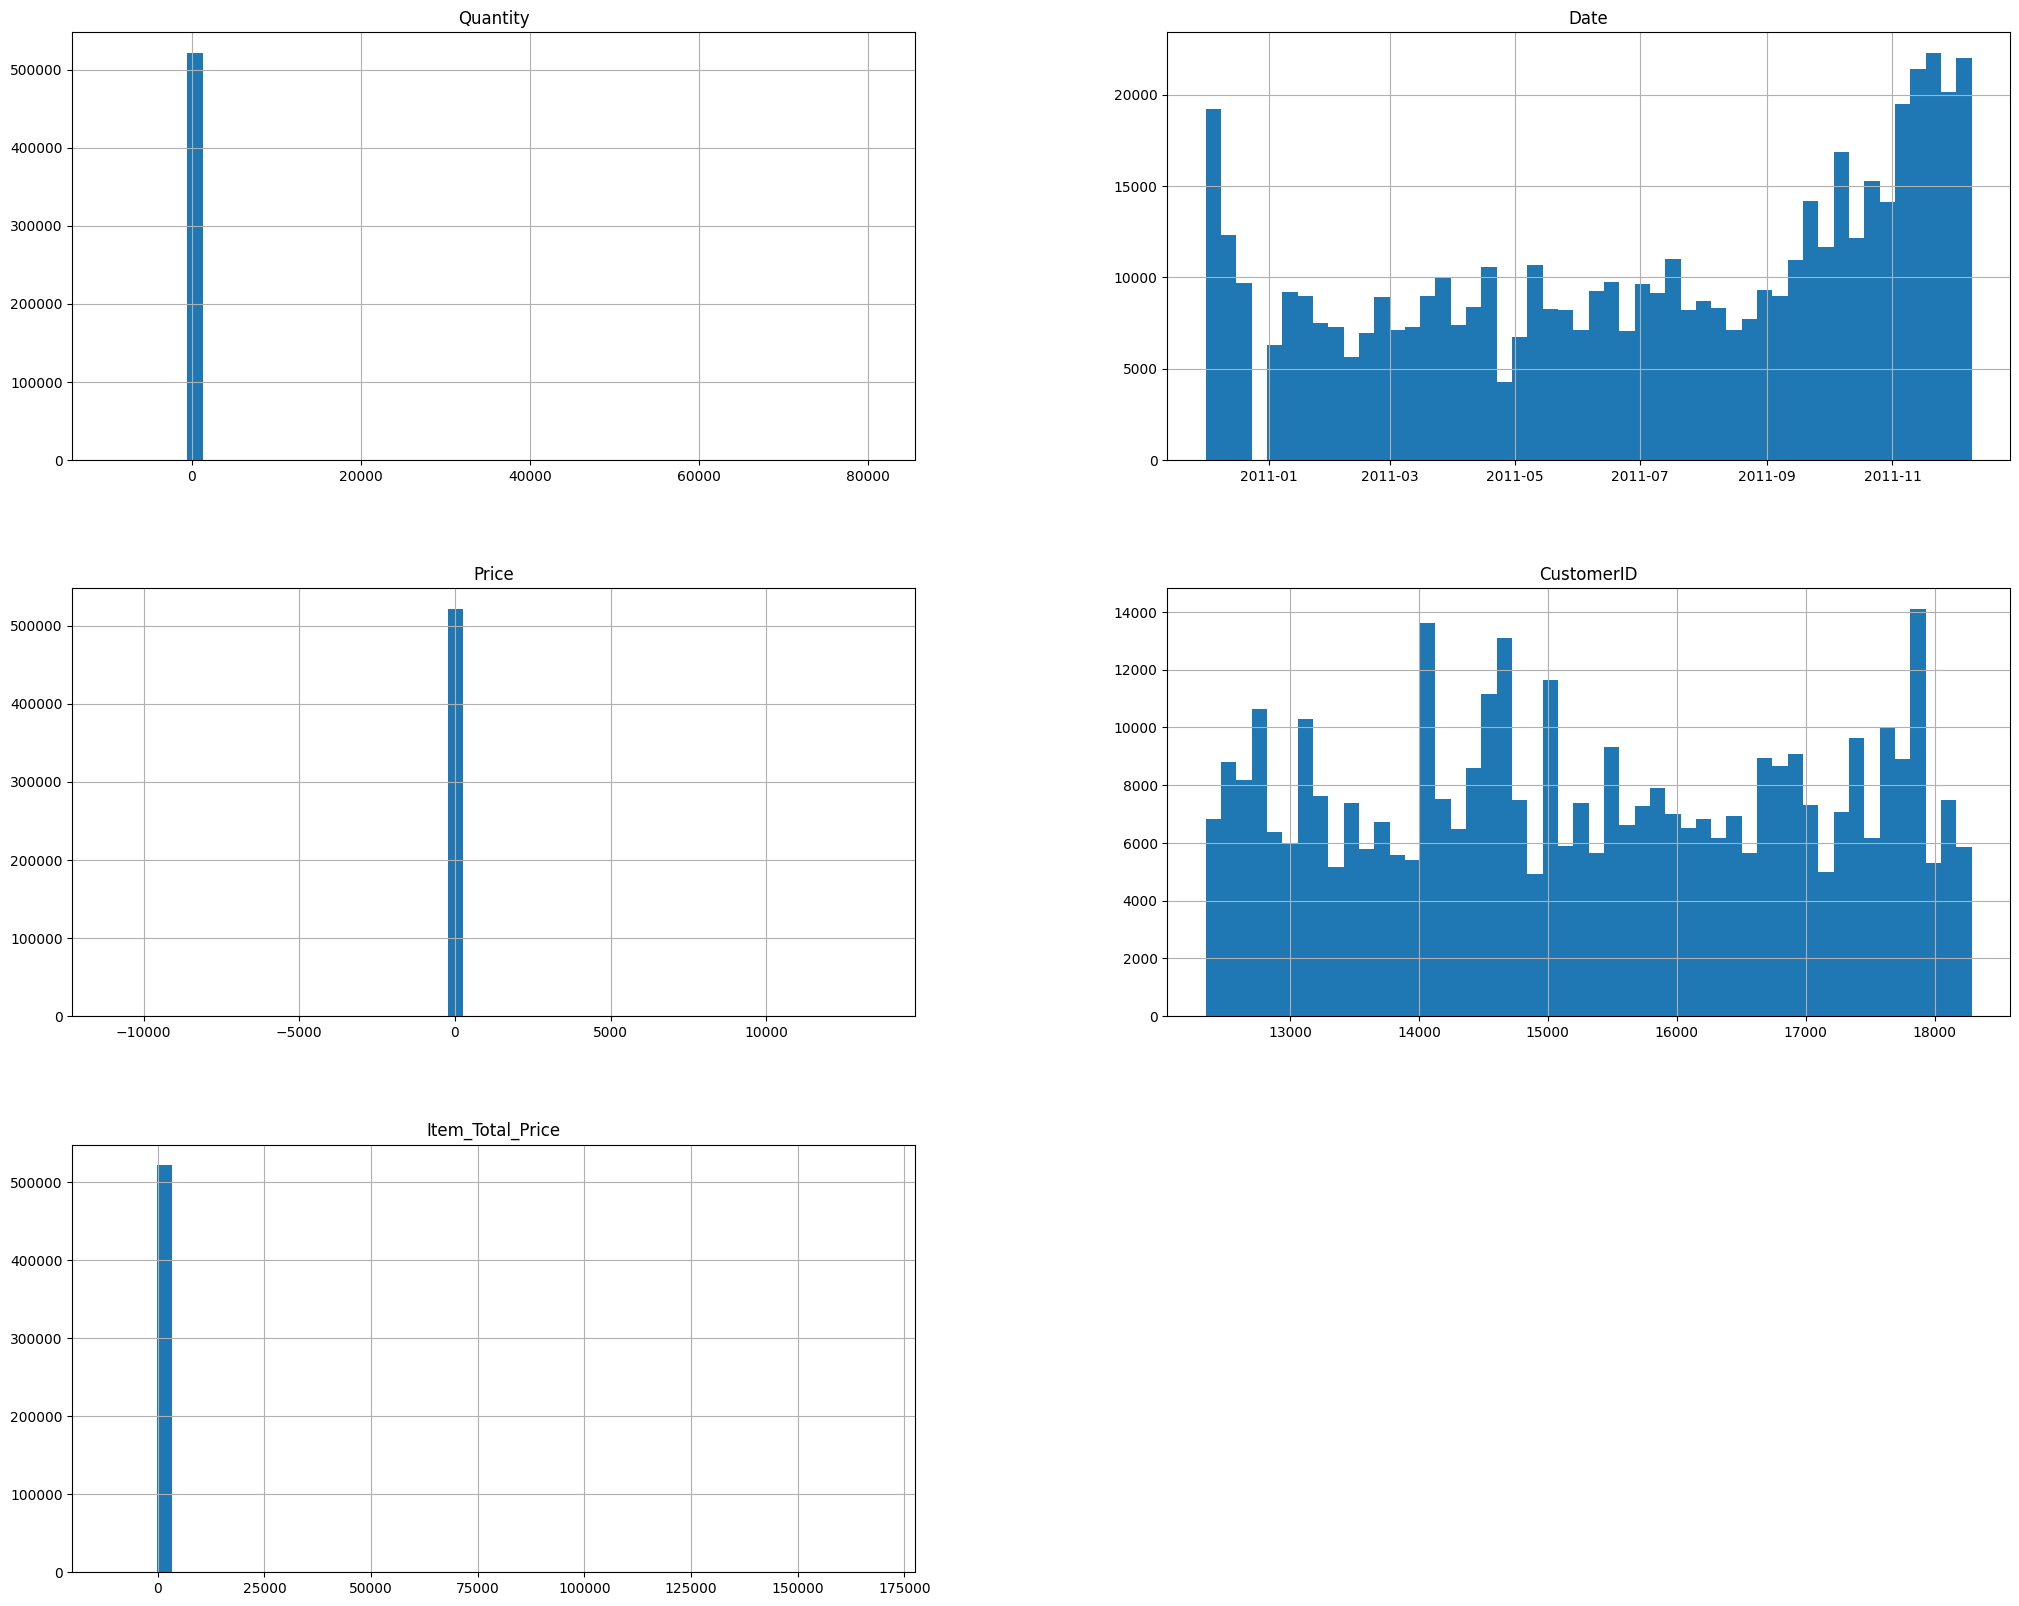

In [ ]:
input_data_df.hist(bins=50, figsize=(25, 20))

## plot time series graphs for each column

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

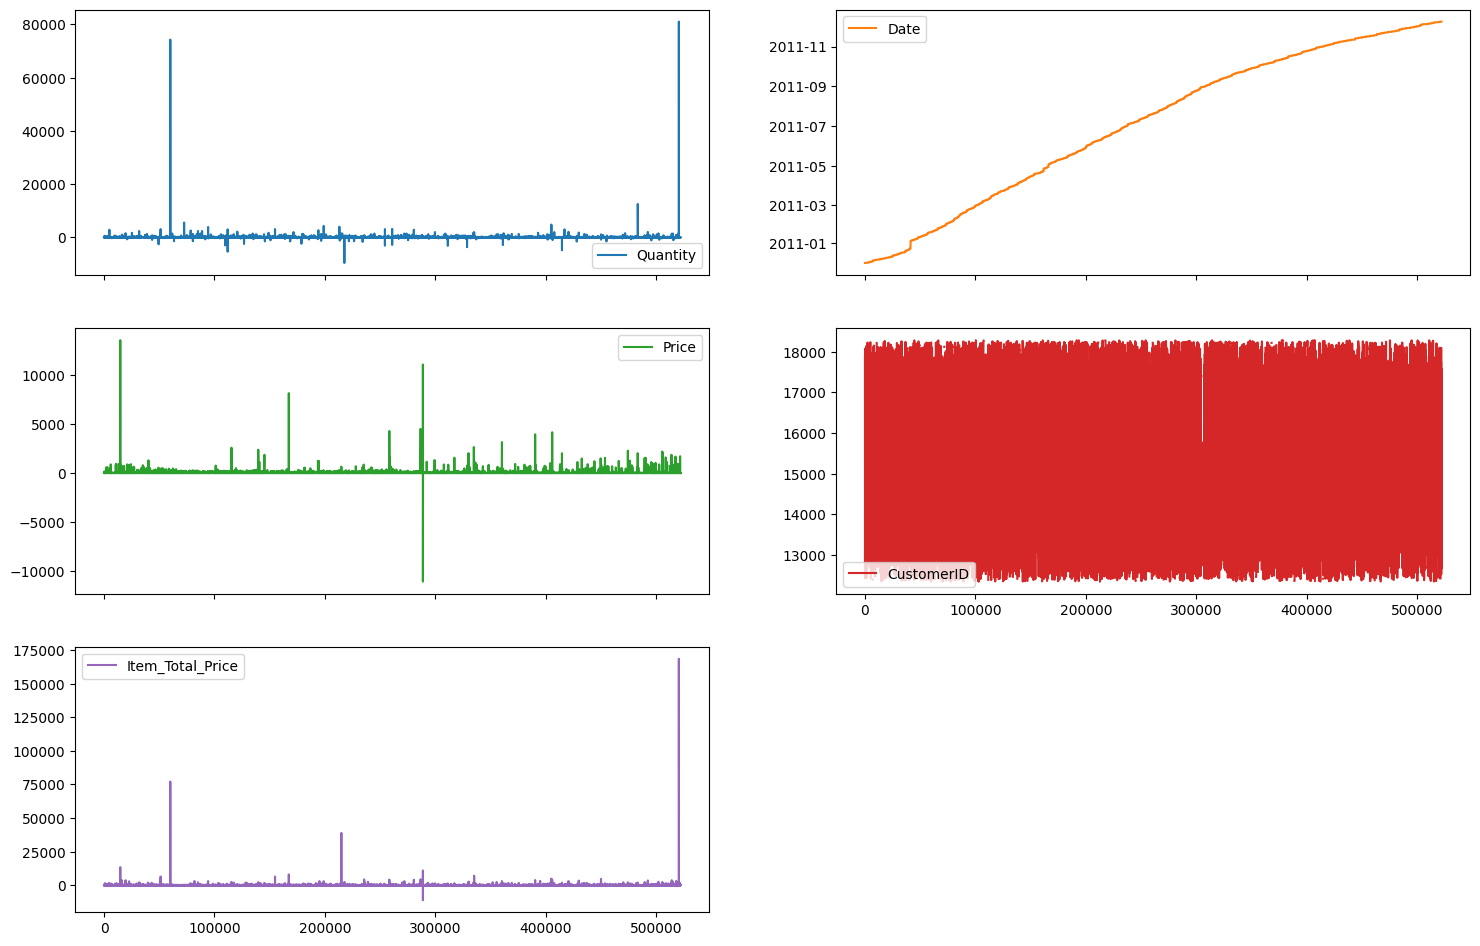

In [ ]:
input_data_df.plot(subplots=True, layout=(5,2), figsize=(18, 20))

# ( rows, coluumns)

# Data Calculations

## strategy
1. Select one of the columns to test and train = high, low, volumne
2. Select input data into test and train
3. Run your models
    a. Linear regression
    b. Random Forest
4. Stop Words
5. Stemming
6. Lemmatization




Tokenization

## Linear Regression

date vs volume

predict values of volume

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables

independent variable = date
dependent variable = volume

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
input_data_df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year_and_Month,Item_Total_Price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.300000
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.340001
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.000000
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.340001
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.340001


In [ ]:
x = input_data_df.copy()
y = input_data_df['Close']

KeyError: 'Close'

In [ ]:
type(x)

In [ ]:
type(y)

In [ ]:
# x2 = x.to_frame()
x2 = x

# print
x2

In [ ]:
# y2 = y.to_frame()
y2 = y

#print
y2

In [ ]:
# x3 = x2.reset_index(drop=True)
x3 = x2
# drop column 'B'
x3 = x3.drop('Date', axis=1)

# print
x3

In [ ]:
# y3 =  y2.reset_index(drop=True)
y3 = y2

# print
y3

In [ ]:
print('Data type = ( x3 = )',type(x3),  'y3 =', type(y3))

In [ ]:
# Train the model
model.fit(x3, y3)
# model.fit(x3.values.reshape(-1, 1), y3.values.reshape(-1, 1))


# Evaluate the model
# r2_score = model.score(x3.values.astype(float).reshape(-1, 1), y3.values.reshape(-1, 1))
r2_score = model.score(x3, y3)
print(f"R-squared value: {r2_score}")

## Random Forest

In [ ]:
model_rand = RandomForestRegressor(n_estimators=200, random_state = 42)

In [ ]:
model_rand.fit(x, y)

In [ ]:
r2_score-rf = model.score(x3, y3)
print(f"R-squared value: {r2_scor_rf}")

The R-squared value measures how well the linear regression model fits the data, ranging from 0 to 1, where 1 indicates a perfect fit.

In [ ]:
text_location = input_data_df.columns.get_loc('text')

# Create a new column 'Country'
input_data_df['text_processed'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_location + 1, 'text_processed', input_data_df.pop('text_processed'))

text_processed_location = input_data_df.columns.get_loc('text_processed')

# Create a new column 'Country'
input_data_df['text_processed_2'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_processed_location + 1, 'text_processed_2', input_data_df.pop('text_processed_2'))

text_processed_location_2 = input_data_df.columns.get_loc('text_processed_2')

# Create a new column 'Country'
input_data_df['text_processed_3'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_processed_location_2 + 1, 'text_processed_3', input_data_df.pop('text_processed_3'))


# print

input_data_df.head()

# print

input_data_df.head()

## 1. Lower case string

In [ ]:
input_data_df['text_processed'] = input_data_df['text'].str.lower()

input_data_df.head()

## 2. tokenize sentenses

In [ ]:
import nltk
nltk.download('all')

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the 'text' column and put the result in a new column 'tokens'
input_data_df['text_processed'] = input_data_df['text_processed'].apply(word_tokenize)

input_data_df.head()

## punctuation removal

In [ ]:

input_data_df['text_processed_2'] = input_data_df['text_processed'].copy()

input_data_df.head()



In [ ]:
input_data_df.loc[:, 'text_processed_3'] = input_data_df.loc[:, 'text_processed_2']

input_data_df.head()

In [ ]:
import string

# input_data_df['text_processed_2'] = input_data_df['text_processed'].copy()

def remove_punctuation(tokens):

  tokens2 = []
  for word in tokens:
    #if (word in string.punctuation):
      #tokens.remove(word)
    if(word not in string.punctuation):
      tokens2.append(word)

  #return tokens
  return tokens2
  # return ""

# input_data_df['text_processed_2'] = input_data_df['text_processed']
input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(remove_punctuation)

input_data_df.head(5)

# input_data_df['text', 'text_processed'].head()

## stop words removal

In [ ]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:

def remove_stop_words(tokens):

  tokens2 = []
  for word in tokens:
    #if (word in stopwords.words('english')):
       #tokens.remove(word)
    if ( word not in stopwords.words('english')):
         tokens2.append(word)

  #return tokens
  return tokens2

input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(remove_stop_words)

input_data_df.head()

## 5. stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english") # use this algorithm as it is new version of porter

def stemwords_in_sentence(tokens):
  stemmed_words = []
  for word in tokens:
      stemmed_word = snowball_stemmer.stem(word)
      stemmed_words.append(stemmed_word)


  return stemmed_words

input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(stemwords_in_sentence)

input_data_df.head()

## 6. lemming

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_in_sentence(tokens):
  lemmatized_words = []
  for word in tokens:
      lemmatized_word =   lemmatizer.lemmatize(word)
      lemmatized_words.append(lemmatized_word)


  return lemmatized_words

input_data_df['text_processed_3'] = input_data_df['text_processed_3'].apply(lemmatize_in_sentence)

input_data_df.head()


## 7. Join tokens into string

In [ ]:
# input_data_df['text_processed_3'] =

In [ ]:
text_processed_location_3 = input_data_df.columns.get_loc('text_processed_3')

# Create a new column 'Country'
input_data_df['text_processed_4'] = ""

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(text_processed_location_3 + 1, 'text_processed_4', input_data_df.pop('text_processed_4'))



In [ ]:
input_data_df['text_processed_4'] = input_data_df['text_processed_3'].apply(lambda token: ' '.join(token))

In [ ]:
input_data_df.head()

## Change column names

## fill mean average values in rows and columns

## Process combined data from control group and test group

# Data Calculations

## Find sentiment of tweets and posts

## VADER (Valence Aware Dictionary and sEntiment Reasoner)

negative, neutral, and positive scores

compound score can range from -1 to 1.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("Wow, NLTK is really powerful!")

In [ ]:
sia.polarity_scores("I had a bad experience at the geocery store!")

In [ ]:
sia.polarity_scores("I am going to office")

In [ ]:
# create get_sentiment function

def get_sentiment(text):

    scores = sia.polarity_scores(text)

    if scores['compound'] > 0 :
        new_sentiment = 1
    if scores['compound'] == 0 :
        new_sentiment = 0
    if scores['compound'] < 0 :
        new_sentiment = -1

    return new_sentiment


# apply get_sentiment function

input_data_df['calculated_sentiment'] = input_data_df['text_processed_4'].apply(get_sentiment)

input_data_df.head()

In [ ]:
# Group by the 'Name' column and count the number of rows in each group
result =  input_data_df.groupby('calculated_sentiment').size()

print(result)

In [ ]:
sentiment_location = input_data_df.columns.get_loc('sentiment')

# Create a new column 'Country'
input_data_df['sentiment_to_number'] = 9999999

# Insert the 'Country' column after the 'Name' column
input_data_df.insert(sentiment_location + 1, 'sentiment_to_number', input_data_df.pop('sentiment_to_number'))

input_data_df.head()

In [ ]:
def convert_sentiment_to_number(sentiment):

  sentiment_number = 66666666

  if(sentiment == 'positive'):
    sentiment_number = 1
  if(sentiment == 'neutral'):
    sentiment_number = 0
  if(sentiment == 'negative'):
     sentiment_number = -1

  return sentiment_number
  # return ""

# input_data_df['text_processed_2'] = input_data_df['text_processed']
input_data_df['sentiment_to_number'] = input_data_df['sentiment'].apply(convert_sentiment_to_number)

input_data_df.head(5)

## Confusion marrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(input_data_df['sentiment_to_number'],
                             input_data_df['calculated_sentiment'])
print(cf_matrix)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(input_data_df['sentiment_to_number'], input_data_df['calculated_sentiment']))

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = [“{0:0.0f}”.format(value) for value in
                cf_matrix.flatten()]
group_percentages = [“{0:.2%}”.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f”{v1}\n{v2}\n{v3}” for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Conversion Rate

Conversion Rate = (Number of Conversions / Number of Visitors) x 100

add new columns
normalized = value between 0 and 1
percent = value between 0 and 100

In [ ]:
combined_data_df['CTR_Normalized'] = 0
combined_data_df['CTR_Percent'] = 0
combined_data_df['CR_Normalized'] = 0
combined_data_df['CR_Percent'] = 0

#print
combined_data_df.head()

In [ ]:
combined_data_df['CTR_Normalized'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions'])

combined_data_df['CTR_Percent'] = (combined_data_df['Clicks'] /
                      combined_data_df['Impressions']) * 100

# print
combined_data_df.head()

In [ ]:
combined_data_df['CR_Normalized'] = (combined_data_df['Purchases'] /
                      combined_data_df['Clicks'])

combined_data_df['CR_Percent'] = (combined_data_df['Purchases'] /
                      combined_data_df['Clicks']) * 100


#print
combined_data_df.head()

In [ ]:
#CTR

temp_df1 = combined_data_df.groupby('Campaign Name')['CTR_Normalized'].mean()


In [ ]:
temp_df2 = combined_data_df.groupby('Campaign Name')['CR_Normalized'].mean()

In [ ]:
temp_df3 = combined_data_df.groupby('Campaign Name')['CTR_Percent'].mean()

In [ ]:
temp_df4 = combined_data_df.groupby('Campaign Name')['CR_Percent'].mean()

In [ ]:
temp_df5 = pd.merge(temp_df1, temp_df2, on='Campaign Name')

#print
temp_df5

In [ ]:
temp_df6 = pd.merge(temp_df3, temp_df4, on='Campaign Name')

In [ ]:
temp_df7 = pd.merge(temp_df5, temp_df6, on='Campaign Name')

# print
temp_df7

In [ ]:
calculations_df = temp_df7

# print
temp_df7

seperator

seperator

# Visualization

## CTR , Click through rate

### Bar chart of CTR

In [ ]:
colors = sns.color_palette(['#06C', '#F4B678'])

sns.barplot(data=calculations_df, x='Campaign Name',
                    y='CTR_Percent', hue='Campaign Name', palette = colors, dodge=False)
plt.title('Average Metrics of CTR')
plt.show()

### Box chart of CTR

In [ ]:
colors = sns.color_palette(['#73C5C5', '#A30000'])

sns.boxplot(x='Campaign Name', y='CTR_Normalized', data=combined_data_df,
            hue='Campaign Name', dodge=False, palette = colors)
plt.title('CTR Distribution by Campaign')
plt.show()

### Violin chart of CTR

In [ ]:
colors = sns.color_palette(['#7CC674', '#F0AB00'])

sns.violinplot(x='Campaign Name', y='CTR_Normalized', data=combined_data_df,
            hue='Campaign Name', dodge=False, palette = colors)
plt.title('CTR Distribution by Campaign')
plt.show()

## CR, Conversion rate

### Bar chart of CR

In [ ]:
colors = sns.color_palette(['#06C', '#F4B678'])

sns.barplot(data=calculations_df, x='Campaign Name',
                    y='CR_Percent', hue='Campaign Name', palette = colors, dodge=False)
plt.title('Average Metrics of CR')
plt.show()

### Box chart of CR

In [ ]:
colors = sns.color_palette(['#73C5C5', '#A30000'])

sns.boxplot(x='Campaign Name', y='CR_Normalized', data=combined_data_df,
            hue='Campaign Name', palette = colors, dodge=False)
plt.title('CR Distribution by Campaign')
plt.show()

### Violin chart of CR

In [ ]:
colors = sns.color_palette(['#7CC674', '#F0AB00'])

sns.violinplot(x='Campaign Name', y='CR_Normalized', data=combined_data_df,
            hue='Campaign Name', palette = colors, dodge=False)
plt.title('CR Distribution by Campaign')
plt.show()

# Analysis and Conclusions

**CTR (Click-Through Rate):**

Visual Observation: The histogram for CTR shows a higher mean for the Test Campaign compared to the Control Campaign.
The KDE line for the Test Campaign is consistently above that of the Control Campaign.
There are more outliers on the right for the Test Campaign than for the Control Campaign.
Conclusion: The Test Campaign has a higher CTR, indicating better engagement.



**CR (Conversion Rate):**

Visual Observation: The histogram for CR shows similar means for both Control and Test Campaigns, with the Test Campaign
having a slightly lower mean. The KDE lines overlap considerably, indicating similar distributions.
Conclusion: There is no significant difference in CR between the Control and Test Campaigns.

# The End 🛑